# Notebook 1 - Exploração inicial dos dados

In [25]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../data/raw/active_alarms_prod.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6881 entries, 0 to 6880
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acal_cd_id                 6881 non-null   object 
 1   acal_cd_alarm_id           6881 non-null   object 
 2   acal_tx_node               6832 non-null   object 
 3   acal_cd_node_id            6881 non-null   object 
 4   acal_tx_node_info          6877 non-null   object 
 5   acal_tx_alert_type         6881 non-null   object 
 6   acal_nm_severity           6881 non-null   int64  
 7   acal_nm_occurrences        6881 non-null   int64  
 8   acal_dt_last_occurrence    6881 non-null   object 
 9   acal_dt_first_occurrence   6881 non-null   object 
 10  acal_tx_identifier         6881 non-null   object 
 11  acal_nm_probes_alert       6881 non-null   object 
 12  acal_tx_snmp_trap          6881 non-null   object 
 13  acal_tx_node_distribution  5078 non-null   objec

In [18]:
df.head(2)

,acal_cd_id,acal_cd_alarm_id,acal_tx_node,acal_cd_node_id,acal_tx_node_info,acal_tx_alert_type,acal_nm_severity,acal_nm_occurrences,acal_dt_last_occurrence,acal_dt_first_occurrence,...,acal_tx_node_vendor,acal_tx_node_region,acal_tx_node_supplier,acal_tx_node_site,acal_tx_node_ip_address,acal_tx_description,acal_tx_node_tag,acal_tx_source,acal_tx_ignore_type,acal_js_extra_fields
0,476a7e63-014b-46c0-abaf-e80dc0cacf14,08559a20-f409-4454-9016-1ac36578b4bb,SPCTP-V40HPP-SVT201-01,f3ba8721-2bb0-46b3-b4dd-c9255bb7a3ad,ATLAS,OPENSHIFT_CLUSTER_PVC,2,1,2025-10-06 08:55:11.921937,2025-10-06 08:55:11.921937,...,NaN,NaN,NaN,NaN,NaN,NAMESPACE_PVC is over the limits 1 or 2 or 3 (...,NaN,smartoss,NaN,NaN
1,121548a8-9210-40a7-847f-988781502e3f,104d90ff-0da2-4c93-b7fe-664c17271419,SPCTP-V40HPP-SVT201-01,f3ba8721-2bb0-46b3-b4dd-c9255bb7a3ad,ATLAS,OPENSHIFT_CLUSTER_PVC,1,2,2025-10-06 08:55:11.921937,2025-10-06 08:50:13.193322,...,NaN,NaN,NaN,NaN,NaN,NAMESPACE_PVC is over the limits 1 or 2 or 3 (...,NaN,smartoss,NaN,NaN


In [19]:
alert_columns = ['acal_tx_alert_type', 'acal_nm_severity', 'acal_nm_occurrences', 'acal_tx_description', 'acal_dt_last_occurrence', 'acal_dt_first_occurrence', 'acal_tx_source']

alerts_df = df[alert_columns]
alerts_df.head()

,acal_tx_alert_type,acal_nm_severity,acal_nm_occurrences,acal_tx_description,acal_dt_last_occurrence,acal_dt_first_occurrence,acal_tx_source
0,OPENSHIFT_CLUSTER_PVC,2,1,NAMESPACE_PVC is over the limits 1 or 2 or 3 (...,2025-10-06 08:55:11.921937,2025-10-06 08:55:11.921937,smartoss
1,OPENSHIFT_CLUSTER_PVC,1,2,NAMESPACE_PVC is over the limits 1 or 2 or 3 (...,2025-10-06 08:55:11.921937,2025-10-06 08:50:13.193322,smartoss
2,SOFTWARE_SERVICE_STATUS_INFO,2,25,NEW UNIT FILE (run-r2e9f4aaf23254cfcbf586daccc...,2025-10-27 04:56:51.145393,2025-10-26 05:57:30.12203,smartoss
3,CAPACITY_DISK_FREE_USED_PERCENT,1,1,USED % is over the limits 1 or 2 or 3 (Value =...,2025-10-01 03:10:41.551299,2025-10-01 03:10:41.551299,smartoss
4,SPARK_JVM_GARBAGE_COLLECTOR_YOUNG,1,168,JVM_GARBAGE_COLLECTOR_YOUNG is over the limits...,2025-10-14 15:20:05.018794,2025-10-14 01:25:05.123944,smartoss


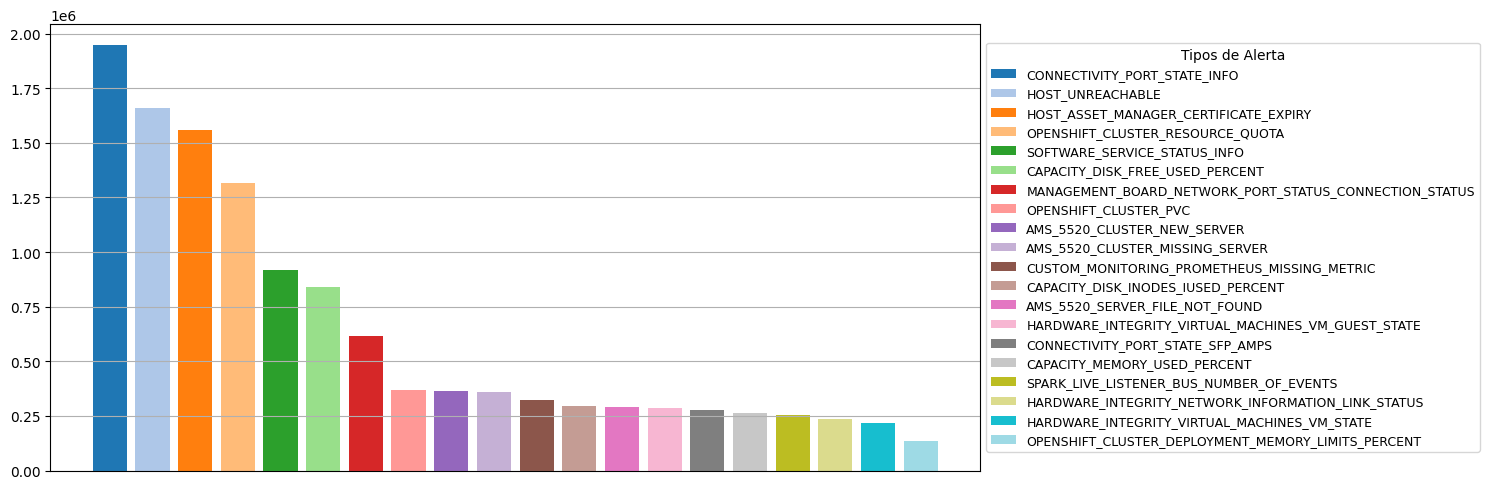

In [46]:
alerts_by_occurrences = alerts_df.groupby('acal_tx_alert_type')['acal_nm_occurrences'].sum().reset_index()
alerts_by_occurrences = alerts_by_occurrences.sort_values(by='acal_nm_occurrences', ascending=False)
alerts_by_occurrences = alerts_by_occurrences.head(20)

colors = plt.cm.tab20(np.linspace(0, 1, len(alerts_by_occurrences)))
fig = plt.figure(figsize=(10,5))
bars = plt.bar(alerts_by_occurrences['acal_tx_alert_type'], alerts_by_occurrences['acal_nm_occurrences'], color=colors)
plt.xticks([])
plt.tight_layout()

plt.legend(bars, alerts_by_occurrences['acal_tx_alert_type'], 
          title="Tipos de Alerta",
          loc='center left', 
          bbox_to_anchor=(1, 0.5),
          fontsize=9)

plt.grid(True)
plt.show()

In [ ]:
alerts_df.loc[:, 'acal_dt_first_occurrence'] = pd.to_datetime(alerts_df['acal_dt_first_occurrence'])
alerts_df.loc[:, 'acal_dt_last_occurrence'] = pd.to_datetime(alerts_df['acal_dt_last_occurrence'])

inicio = '2025-12-01'
fim = '2025-12-07 23:59:59'
timeseries = alerts_df[
    (alerts_df['acal_dt_first_occurrence'] >= inicio) & 
    (alerts_df['acal_dt_first_occurrence'] <= fim)
].copy()
timeseries



,acal_tx_alert_type,acal_nm_severity,acal_nm_occurrences,acal_tx_description,acal_dt_last_occurrence,acal_dt_first_occurrence,acal_tx_source
21,SOFTWARE_SERVICE_STATUS_INFO,2,4,NEW UNIT FILE (auxmanager.service) WAS INDENTI...,2025-12-05 07:01:33.852454,2025-12-02 07:01:29.763258,smartoss
30,DRUID_QUERY_TIMEMILLES_TOTAL,1,2,ERROR - Total Time maior que 30s = 3.05 - Smar...,2025-12-05 18:22:11.705239,2025-12-05 18:07:10.734602,smartoss
51,3SCALE_PRODUCT_STATUS_CLASS_DEVIATION,1,26,ERROR - HTTP STATUS CLASS (DEVIATION_PERCENT) ...,2025-12-05 18:15:06.728081,2025-12-05 12:00:07.335276,smartoss
61,SOFTWARE_SERVICE_STATUS_INFO,2,24,NEW UNIT FILE (run-r9f2b387a88104d569d911f7c30...,2025-12-05 17:43:04.673555,2025-12-04 18:41:18.970481,smartoss
63,OPENSHIFT_CLUSTER_PVC,1,527,NAMESPACE_PVC is over the limits 1 or 2 or 3 (...,2025-12-05 18:25:12.843518,2025-12-03 22:10:11.145503,smartoss
...,...,...,...,...,...,...,...
6857,SPARK_CODE_GENERATOR_CLASS_SIZE,3,352,CODE_GENERATOR_CLASS_SIZE is over the limits 1...,2025-12-05 18:25:05.014898,2025-12-02 21:25:07.221971,smartoss
6861,CUSTOM_MONITORING_PROMETHEUS_MISSING_METRIC,2,631,"Query executada com sucesso, porém não retorno...",2025-12-05 18:25:05.023627,2025-12-03 13:55:05.018959,smartoss
6862,CUSTOM_MONITORING_PROMETHEUS_MISSING_METRIC,2,628,"Query executada com sucesso, porém não retorno...",2025-12-05 18:25:05.051723,2025-12-03 14:10:05.036522,smartoss
6869,SPARK_LIVE_LISTENER_BUS_NUMBER_OF_APP,1,352,LIVE_LISTENER_BUS_NUMBER_OF_APP is over the li...,2025-12-05 18:25:05.014898,2025-12-02 21:25:07.221971,smartoss
